# Loan Prediction 06 - Training and Validation of Models with MissForest Imputed Dataset

In [1]:
import sys
sys.path.append('utils')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('seaborn')


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import metrics_utils 
import model_utils

In [2]:
df_import = pd.read_csv('dataset/train_rf_imputed.csv')
df_import.drop(columns='Unnamed: 0',inplace = True)
df_import.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,150.81,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.00,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.00,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.00,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.00,360.0,1.0,2.0,1
5,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.00,360.0,1.0,2.0,1
6,1.0,1.0,0.0,1.0,0.0,2333.0,1516.0,95.00,360.0,1.0,2.0,1
7,1.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.00,360.0,0.0,1.0,0
8,1.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.00,360.0,1.0,2.0,1
9,1.0,1.0,1.0,0.0,0.0,12841.0,10968.0,349.00,360.0,1.0,1.0,0


In [3]:
columns_x = df_import.columns[:-1]
column_y = ['Loan_Status']

X_train, X_validation, y_train, y_validation = train_test_split(
    df_import[columns_x], df_import[column_y],  test_size=0.20, random_state=42)

In [4]:
scaler = MinMaxScaler()
scaler.fit(df_import[columns_x])

X_train_norm = pd.DataFrame(data=scaler.transform(X_train),columns=X_train.columns)
X_validation_norm = pd.DataFrame(data=scaler.transform(X_validation),columns=X_train.columns)

In [5]:
X_train_norm.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.00000
mean,0.810591,0.633401,0.245078,0.221996,0.136456,0.066205,0.040235,0.201752,0.702491,0.855397,0.51833
std,0.392233,0.482367,0.336576,0.416012,0.343622,0.073382,0.076263,0.125516,0.143043,0.352059,0.39080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011577,0.000000,0.000000,0.00000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.034242,0.000000,0.133430,0.743590,1.000000,0.00000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.046382,0.027024,0.173661,0.743590,1.000000,0.50000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.071589,0.055992,0.228654,0.743590,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
X_validation_norm.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.845528,0.715447,0.276423,0.203252,0.121951,0.060081,0.033617,0.187958,0.720033,0.845528,0.520325
std,0.362878,0.453047,0.337966,0.404064,0.328568,0.083838,0.037248,0.116202,0.113137,0.362878,0.406899
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.006481,0.000000,0.000000,0.153846,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.032010,0.000000,0.124457,0.743590,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.042684,0.030240,0.160637,0.743590,1.000000,0.500000
75%,1.000000,1.000000,0.666667,0.000000,0.000000,0.059988,0.052176,0.225687,0.743590,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.781534,0.185999,0.855282,1.000000,1.000000,1.000000


In [7]:
lr = LogisticRegression(random_state=0,solver='liblinear',verbose=1)
lr.fit(X_train_norm.values,y_train.values.ravel())

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [8]:
df_result = model_utils.predict(lr,X_validation_norm,y_validation)
df_result.head(10)

,TrueClass,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,1
9,0,1


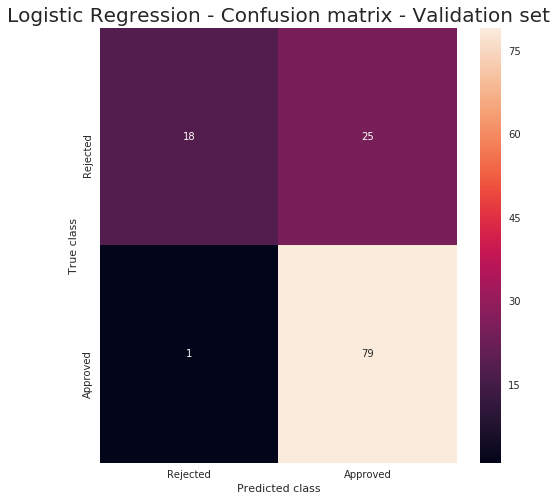

              precision    recall  f1-score   support

    Rejected       0.95      0.42      0.58        43
    Approved       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.491


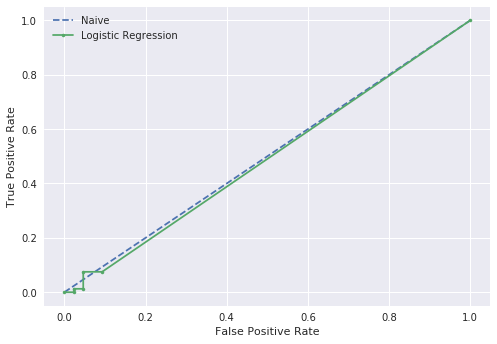

In [9]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,'Logistic Regression')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = lr,model_name = 'Logistic Regression',X_test = X_validation, y_test = y_validation)

In [14]:
rfc = RandomForestClassifier(
    n_estimators = 100,
    min_samples_split = 3,
    random_state = 0)
rfc.fit(X_train_norm.values,y_train.values.ravel())
df_result = model_utils.predict(rfc,X_validation_norm,y_validation)

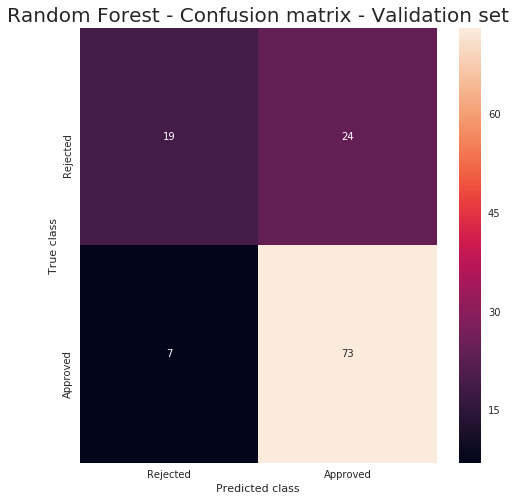

              precision    recall  f1-score   support

    Rejected       0.73      0.44      0.55        43
    Approved       0.75      0.91      0.82        80

    accuracy                           0.75       123
   macro avg       0.74      0.68      0.69       123
weighted avg       0.74      0.75      0.73       123

No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.391


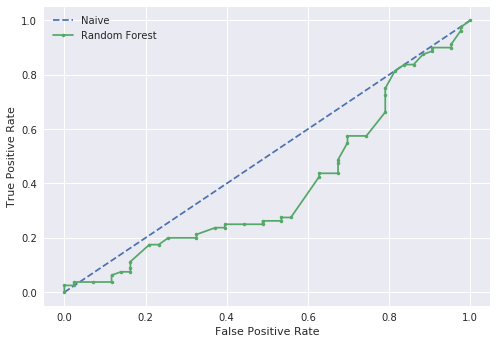

In [15]:
tn, fp, fn, tp = metrics_utils.plot_confusion_matrix(df_result,title = 'Random Forest')
metrics_utils.show_performance(df_result)
metrics_utils.plot_ROC(model = rfc,model_name = 'Random Forest',X_test = X_validation, y_test = y_validation)